# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [27]:
!pip install palmerpenguins
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import make_column_selector, ColumnTransformer
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from plotnine import *
from sklearn.neighbors import KNeighborsClassifier

In [3]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [4]:
ct = ColumnTransformer([("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
                                        make_column_selector(dtype_include=object))],
                                        remainder = "passthrough")

penguins_pipeline = Pipeline([
        ("preprocessing", ct)
    ])

X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

penguins_pipeline.fit(X)

trans_pen = penguins_pipeline.named_steps["preprocessing"].transform(X)
trans_penguin = pd.DataFrame(trans_pen, columns=penguins_pipeline.named_steps["preprocessing"].get_feature_names_out())
trans_penguin

,dummify__species_Adelie,dummify__species_Chinstrap,dummify__species_Gentoo,dummify__island_Biscoe,dummify__island_Dream,dummify__island_Torgersen,dummify__sex_female,dummify__sex_male,remainder__bill_length_mm,remainder__flipper_length_mm,remainder__body_mass_g,remainder__year
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,39.1,181.0,3750.0,2007.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,39.5,186.0,3800.0,2007.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,40.3,195.0,3250.0,2007.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,36.7,193.0,3450.0,2007.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,39.3,190.0,3650.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,55.8,207.0,4000.0,2009.0
329,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,43.5,202.0,3400.0,2009.0
330,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,49.6,193.0,3775.0,2009.0
331,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,50.8,210.0,4100.0,2009.0


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [32]:
dummify = Pipeline([
    ("dummy", OneHotEncoder())
])

standScale = Pipeline([
    ("scalar", StandardScaler())
])

ct = ColumnTransformer([
    ('num', standScale, make_column_selector(dtype_include=np.number)),
    ("cat", dummify, make_column_selector(dtype_include=object))
])

X = penguins.drop(columns=['species'])
y = penguins['species']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

pipeline_knn5 = Pipeline(
    [("preprocessor", ct),
     ("kNN", KNeighborsClassifier(n_neighbors=5))]
)

pipeline_knn20 = Pipeline(
    [("preprocessor", ct),
     ("kNN", KNeighborsClassifier(n_neighbors=20))]
)

pipeline_tree1 = Pipeline(
    [("preprocessor", ct),
     ("decision", DecisionTreeClassifier(ccp_alpha=1))]
)

pipeline_tree05 = Pipeline(
    [("preprocessor", ct),
     ("decision", DecisionTreeClassifier(ccp_alpha=0.5))]
)

In [34]:
#fit models
pipeline_knn5.fit(X_train, y_train)
pipeline_knn20.fit(X_train, y_train)
pipeline_tree1.fit(X_train, y_train)
pipeline_tree05.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6f9859f400>),
                                                 ('cat',
                                                  Pipeline(steps=[('dummy',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6f9ad1f8b0>)])),
                ('decision', DecisionTreeClassifier(ccp_alpha=0.5))])

In [35]:
#predictions
pred_knn5 = pipeline_knn5.predict(X_test)
pred_knn20 = pipeline_knn20.predict(X_test)
pred_tree1 = pipeline_tree1.predict(X_test)
pred_tree05 = pipeline_tree05.predict(X_test)

In [36]:
#Probabilities
prob_knn5 = pipeline_knn5.predict_proba(X_test)
prob_knn20 = pipeline_knn20.predict_proba(X_test)
prob_tree1 = pipeline_tree1.predict_proba(X_test)
prob_tree05 = pipeline_tree05.predict_proba(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve, auc, classification_report

def eval(y_test, y_pred, y_prob, model_name):
    # Confusion Matrix
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))

    # Dynamically handle target names based on unique classes
    unique_classes = sorted(set(y_test))
    target_names = [f"Class{cls}" for cls in unique_classes]

    # Precision, Recall, F1-Score
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=target_names))

In [49]:
eval(y_test, pred_knn5, prob_knn5, "kNN (k=5)")

Confusion Matrix for kNN (k=5):
[[28  0  0]
 [ 0 13  0]
 [ 0  0 26]]

Classification Report for kNN (k=5):
                precision    recall  f1-score   support

   ClassAdelie       1.00      1.00      1.00        28
ClassChinstrap       1.00      1.00      1.00        13
   ClassGentoo       1.00      1.00      1.00        26

      accuracy                           1.00        67
     macro avg       1.00      1.00      1.00        67
  weighted avg       1.00      1.00      1.00        67



In [50]:
eval(y_test, pred_knn20, prob_knn20, "kNN (k=20)")

Confusion Matrix for kNN (k=20):
[[28  0  0]
 [ 1 12  0]
 [ 0  0 26]]

Classification Report for kNN (k=20):
                precision    recall  f1-score   support

   ClassAdelie       0.97      1.00      0.98        28
ClassChinstrap       1.00      0.92      0.96        13
   ClassGentoo       1.00      1.00      1.00        26

      accuracy                           0.99        67
     macro avg       0.99      0.97      0.98        67
  weighted avg       0.99      0.99      0.98        67



In [51]:
eval(y_test, pred_tree1, prob_tree1, "Decision Tree (ccp_alpha=1)")

Confusion Matrix for Decision Tree (ccp_alpha=1):
[[28  0  0]
 [13  0  0]
 [26  0  0]]

Classification Report for Decision Tree (ccp_alpha=1):
                precision    recall  f1-score   support

   ClassAdelie       0.42      1.00      0.59        28
ClassChinstrap       0.00      0.00      0.00        13
   ClassGentoo       0.00      0.00      0.00        26

      accuracy                           0.42        67
     macro avg       0.14      0.33      0.20        67
  weighted avg       0.17      0.42      0.25        67



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [52]:
eval(y_test, pred_tree05, prob_tree05, "Decision Tree (ccp_alpha=0.5)")

Confusion Matrix for Decision Tree (ccp_alpha=0.5):
[[28  0  0]
 [13  0  0]
 [26  0  0]]

Classification Report for Decision Tree (ccp_alpha=0.5):
                precision    recall  f1-score   support

   ClassAdelie       0.42      1.00      0.59        28
ClassChinstrap       0.00      0.00      0.00        13
   ClassGentoo       0.00      0.00      0.00        26

      accuracy                           0.42        67
     macro avg       0.14      0.33      0.20        67
  weighted avg       0.17      0.42      0.25        67



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_for_species(y_test, y_prob_dict, species_name, model_names):

    y_binary = (y_test == species_name).astype(int)

    plt.figure(figsize=(10, 6))

    for model_name in model_names:
        y_prob = y_prob_dict[model_name][:, 1]

        fpr, tpr, _ = roc_curve(y_binary, y_prob)
        auc = roc_auc_score(y_binary, y_prob)

        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.4f})")

    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for '{species_name}' Across Models")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

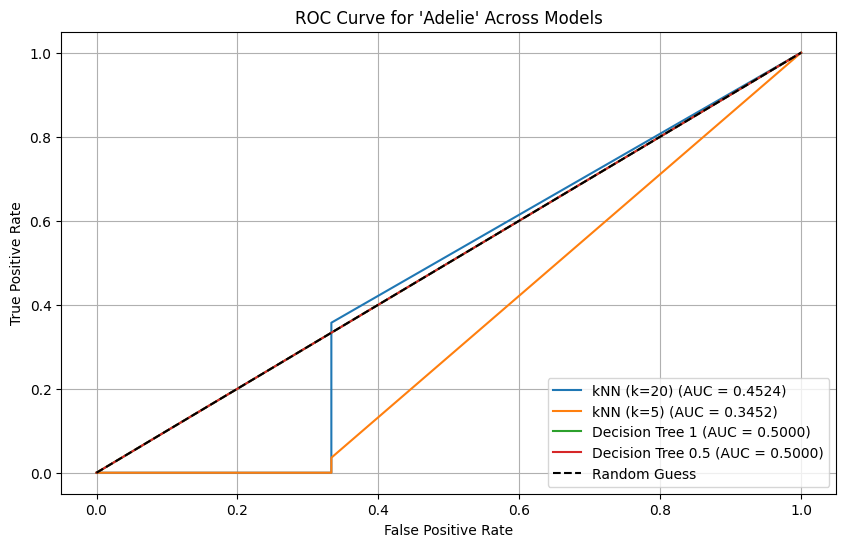

In [54]:
y_prob_dict = {
    "kNN (k=20)": prob_knn20,
    "kNN (k=5)": prob_knn5,
    "Decision Tree 1": prob_tree1,
    "Decision Tree 0.5": prob_tree05
}

plot_roc_for_species(y_test, y_prob_dict, species_name="Adelie", model_names=["kNN (k=20)", "kNN (k=5)", "Decision Tree 1", "Decision Tree 0.5"])